AIM: To find and train a final neural network model.

In [1]:
import helper_analysis
from collections import Counter
import numpy
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.vis_utils import plot_model
import keras
from matplotlib import pyplot
from numpy.random import seed
seed(12)

2022-10-18 04:45:37.019161: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-18 04:45:37.019194: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# load the vocabulary
vocab_filename = 'Data/Vocab/vocab_all_occ.txt' # vocab filename with its location
vocab = helper_analysis.load_doc(vocab_filename)
vocab = set(vocab.split())

In [3]:
# load all reviews
train_docs, ytrain = helper_analysis.load_clean_dataset(vocab, True)
test_docs, ytest = helper_analysis.load_clean_dataset(vocab, False)

In [4]:
# create tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs)

# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='binary')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='binary')

In [5]:
# split train set into train set and validation set
Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain, ytrain, train_size=0.8, random_state=12)
validation_set = (numpy.array(Xvalid), numpy.array(yvalid))

In [6]:
# define network
n_words = Xtest.shape[1]
model = Sequential()
model.add(Dense(24, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(n_words,), activation='relu', name='inputLayer'))
model.add(Dropout(0.8, name='dropoutLayer1'))
model.add(Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', name='hiddenLayer'))
model.add(Dropout(0.6, name='dropoutLayer2'))
model.add(Dense(1, activation='sigmoid', name='outputLayer'))
model._name = 'regularizedModel'

# compile model
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# model summary
model.summary()

# early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('Models/best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=False)

# fit model
history = model.fit(numpy.array(Xtrain), numpy.array(ytrain), epochs=30, verbose=2, batch_size=32,
          validation_data=validation_set, 
                    callbacks=[#es, 
                        mc]
                   )

Model: "regularizedModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Dense)          (None, 24)                1055112   
                                                                 
 dropoutLayer1 (Dropout)     (None, 24)                0         
                                                                 
 hiddenLayer (Dense)         (None, 16)                400       
                                                                 
 dropoutLayer2 (Dropout)     (None, 16)                0         
                                                                 
 outputLayer (Dense)         (None, 1)                 17        
                                                                 
Total params: 1,055,529
Trainable params: 1,055,529
Non-trainable params: 0
_________________________________________________________________


2022-10-18 04:45:41.379403: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-18 04:45:41.379435: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-18 04:45:41.379453: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b4824bc1dc83): /proc/driver/nvidia/version does not exist
2022-10-18 04:45:41.379697: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
45/45 - 1s - loss: 0.7331 - accuracy: 0.5099 - val_loss: 0.7089 - val_accuracy: 0.6412 - 858ms/epoch - 19ms/step
Epoch 2/30
45/45 - 0s - loss: 0.7034 - accuracy: 0.5643 - val_loss: 0.6989 - val_accuracy: 0.7401 - 211ms/epoch - 5ms/step
Epoch 3/30
45/45 - 0s - loss: 0.6861 - accuracy: 0.6095 - val_loss: 0.6679 - val_accuracy: 0.8107 - 208ms/epoch - 5ms/step
Epoch 4/30
45/45 - 0s - loss: 0.6702 - accuracy: 0.6222 - val_loss: 0.6460 - val_accuracy: 0.8023 - 201ms/epoch - 4ms/step
Epoch 5/30
45/45 - 0s - loss: 0.6304 - accuracy: 0.6723 - val_loss: 0.6086 - val_accuracy: 0.8644 - 227ms/epoch - 5ms/step
Epoch 6/30
45/45 - 0s - loss: 0.6111 - accuracy: 0.6914 - val_loss: 0.5743 - val_accuracy: 0.8729 - 214ms/epoch - 5ms/step
Epoch 7/30
45/45 - 0s - loss: 0.5984 - accuracy: 0.7140 - val_loss: 0.5736 - val_accuracy: 0.8531 - 216ms/epoch - 5ms/step
Epoch 8/30
45/45 - 0s - loss: 0.6104 - accuracy: 0.7055 - val_loss: 0.5249 - val_accuracy: 0.8757 - 217ms/epoch - 5ms/step
Epoch 9/30
45/4

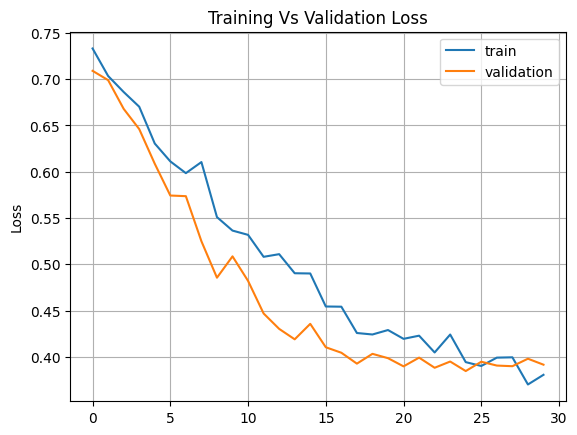

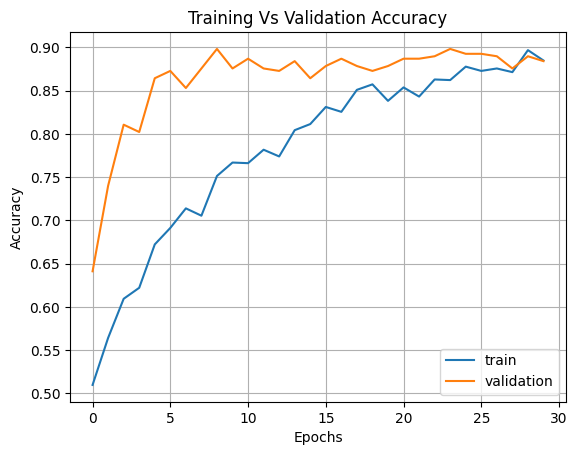

In [7]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.title("Training Vs Validation Loss")
pyplot.ylabel('Loss')
pyplot.grid()
pyplot.show()

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.title("Training Vs Validation Accuracy")
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.grid()
pyplot.show()

In [8]:
# load the saved model
saved_model = load_model('Models/best_model.h5')

# evaluate
_, acc = saved_model.evaluate(numpy.array(Xtest), numpy.array(ytest), verbose=2)
print('Accuracy: ', acc)

7/7 - 0s - loss: 0.3824 - accuracy: 0.9171 - 100ms/epoch - 14ms/step
Accuracy:  0.9170984625816345
